<a href="https://colab.research.google.com/github/leogalbu/Colab_Notebook/blob/Image_Classification/Binary_Food_Classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Importing all libraries


In [1]:
# Common utilities
import zipfile
import os
import pathlib
import random
# Data Analysis
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
# Tensorflow
import tensorflow as tf
from keras_preprocessing.image import ImageDataGenerator
from tensorflow.keras.optimizers import Adam
from keras.layers import Dense, Flatten, Conv2D, MaxPool2D, Activation, Dropout, GlobalAveragePooling2D
from keras import Sequential

In [2]:
import zipfile

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

zip_ref = zipfile.ZipFile('pizza_steak.zip')
zip_ref.extractall()
zip_ref.close()

--2022-08-31 12:43:25--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.200.128, 74.125.68.128, 74.125.24.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.200.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.47M  31.1MB/s    in 3.4s    

2022-08-31 12:43:30 (31.1 MB/s) - ‘pizza_steak.zip’ saved [109540975/109540975]



## Printing directories and images list


In [3]:
for dirpath, dirnames, filenames in os.walk('pizza_steak'):
  print(f"The are {len(dirnames)} directories, {len(filenames)} images in '{dirpath}'")

The are 2 directories, 0 images in 'pizza_steak'
The are 2 directories, 0 images in 'pizza_steak/train'
The are 0 directories, 750 images in 'pizza_steak/train/pizza'
The are 0 directories, 750 images in 'pizza_steak/train/steak'
The are 2 directories, 0 images in 'pizza_steak/test'
The are 0 directories, 250 images in 'pizza_steak/test/pizza'
The are 0 directories, 250 images in 'pizza_steak/test/steak'


## Get Classnames

In [4]:
data_dir = pathlib.Path('pizza_steak/train')
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
print(class_names);

['pizza' 'steak']


## Visualizes Images

In [5]:
def view_random_image(target_dir, target_class):
  target_folder = target_dir + '/' + target_class
  random_image = random.sample(os.listdir(target_folder),1)
  img = mpimg.imread(target_folder + '/' + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis('off')

  print(f"Image shape: {img.shape}")
  return img


Image shape: (384, 512, 3)


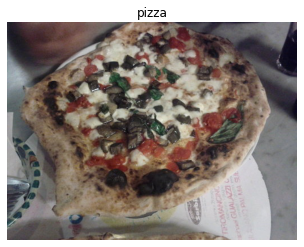

In [6]:
# Visualiza random pizza image
img  = view_random_image("pizza_steak/train", 'pizza')

## Setting the directory

In [7]:
train_dir = 'pizza_steak/train'
test_dir = 'pizza_steak/test'

## First CNN Model =====> Baseline

* Define the model
* Setting the generator class for traininig (with data augmentation) and for test data
* Compile the model
* Fitting the model
* Plotting the loss curves

In [8]:
# Setting seed
tf.random.set_seed(42)

In [9]:
# Define the model
baseline_model = Sequential([
    Conv2D(32,3, input_shape=(224,224,3), activation='relu'),
    Conv2D(32,3, activation='relu'),
    MaxPool2D(2),
    Conv2D(64, 3, activation='relu'),
    Conv2D(64,3, activation='relu'),
    MaxPool2D(2),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(1, activation='sigmoid')
])

In [10]:
# Compile the Model
baseline_model.compile(loss='binary_crossentropy', metrics=['accuracy'], optimizer=Adam())

In [11]:
# Define the Generator for the image
train_datagen = ImageDataGenerator(rescale=1/255., rotation_range=0.2, shear_range=0.2, zoom_range=0.2, width_shift_range=0.2, height_shift_range=0.2, fill_mode='nearest', horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1/255.)

In [12]:
# Looad the images with keras flow from directory
train_data = train_datagen.flow_from_directory(train_dir,target_size=(224,224), batch_size=32, class_mode='binary')
test_data = test_datagen.flow_from_directory(test_dir, target_size=(224,224), batch_size=32, class_mode='binary')


Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [13]:
# Fit the model
baseline_history = baseline_model.fit(train_data, steps_per_epoch=len(train_data), epochs=5, validation_data=test_data, validation_steps=len(test_data))

Epoch 1/5
47/47 [==============================] - 40s 519ms/step - loss: 0.7771 - accuracy: 0.6213 - val_loss: 0.3815 - val_accuracy: 0.8500
Epoch 2/5
47/47 [==============================] - 25s 529ms/step - loss: 0.5300 - accuracy: 0.7607 - val_loss: 0.4140 - val_accuracy: 0.8340
Epoch 3/5
47/47 [==============================] - 23s 492ms/step - loss: 0.4846 - accuracy: 0.7793 - val_loss: 0.3194 - val_accuracy: 0.8780
Epoch 4/5
47/47 [==============================] - 23s 486ms/step - loss: 0.4150 - accuracy: 0.8100 - val_loss: 0.2519 - val_accuracy: 0.9040
Epoch 5/5
47/47 [==============================] - 23s 485ms/step - loss: 0.3753 - accuracy: 0.8300 - val_loss: 0.2738 - val_accuracy: 0.8900


## Helper Functions

In [14]:
def plot_loss_curves(history):
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  epochs = range(len(history.history['accuracy']))
  
  plt.plot(epochs, loss, label='Training Loss')
  plt.plot(epochs, val_loss, label='Val Loss')
  plt.title('Loss')
  plt.xlabel('Epochs')
  plt.legend()
  plt.figure()
  plt.plot(epochs, accuracy, label='Training Accuracy')
  plt.plot(epochs, val_accuracy, label='Val Accuracy')
  plt.title('Accuracy')
  plt.xlabel('Epochs')
  plt.legend()

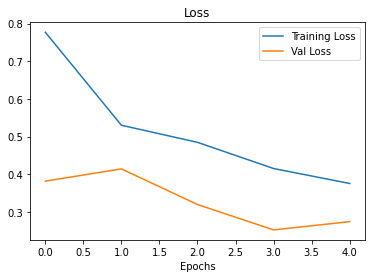

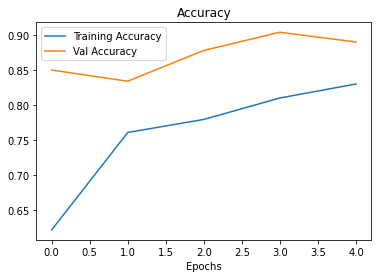

In [15]:
# Plotting Baseline Model Loss Curves
plot_loss_curves(baseline_history)

## Define a Complex Model